# Word2Vec

![Erfan](./assets/Erfan.jpg)
- by Erfan Fakoor
- Contact : e.f.simorgh@gmail.com
- Pattern Recognition - Octobor 2024

In this reading, we want to get acquainted with the concept of Word2Vec. let's start with a quote:

**_"There is in all things a pattern that is part of our universe. It has symmetry, elegance, and grace - those qualities you find always in that which the true artist captures. You can find it in the turning of the seasons, in the way sand trails along a ridge, in the branch clusters of the creosote bush or the pattern of its leaves.
We try to copy these patterns in our lives and our society, seeking the rhythms, the dances, the forms that comfort. Yet, it is possible to see peril in the finding of ultimate perfection. It is clear that the ultimate pattern contains it own fixity. In such perfection, all things move toward death"_**
~Dune by Frank Herbert (1965) 
## Learning Goals

1. **Introduction to Word Embeddings**
2. **Introduction to Language Modeling**
3. **Familiarization with Language Model Training**
4. **Introduction to Word2Vec**
5. **Understanding How Word2Vec is Trained**
6. **Familiarization with Different Structures of Word2Vec**
7. **Familiarization with the Word2Vec Training Process**
8. **Working with Word2Vec in Python**
9. **Understanding Why Word2Vec is Revolutionary**
10. **Understanding the Limitations of Word2Vec**
11. **Understanding the Applications of W2Vec**

## Introduction

The concept of embeddings is one of the most intriguing aspects of machine learning, especially in the context of Natural Language Processing (NLP). When we use Siri, Google Assistant, Alexa, Google Translate, or a smartphone keyboard with predictive text, we likely experience the power of embeddings. Over the past couple of decades, there has been significant progress in applying embeddings to neural models, with recent advancements such as contextualized word embeddings driving state-of-the-art models like BERT and GPT-2.

Word2vec, introduced in 2013, is a highly efficient method for creating word embeddings. Beyond its primary use in Natural Language Processing (NLP), some of its underlying concepts have proven effective for building recommendation engines and analyzing sequential data in non-language-related tasks. Major companies such as Airbnb, Alibaba, Spotify, and Anghami have leveraged this powerful tool, applying it in production to create a new generation of recommendation systems.

Now, we’ll explore the idea of embeddings and the process of generating them with word2vec. But first, let’s start with a simple example to illustrate how vectors can represent various things.

### Personality Embeddings: What are you like?

Did you know that a set of five numbers (a vector) can reveal a lot about your personality? On a scale from 0 to 100, where 0 represents extreme introversion and 100 represents extreme extraversion, how would you rate yourself? Have you ever taken a personality test like the MBTI or, even better, the Big Five Personality Traits test? If not, these tests ask a series of questions and evaluate you across different dimensions, with introversion/extraversion being one of them.

![big-five-personality-traits-score.jpg](./assets/1.jpg)

Suppose Jay scored 38/100 as his introversion/extraversion score. we can plot that in this way:

![introversion-extraversion-100](./assets/2.jpg)

Let’s change the range to be from -1 to 1:

![introversion-extraversion-1](./assets/3.jpg)

How well do we feel we know Jay knowing only this one piece of information about him? Not much. People are complex. So let’s add another dimension – the score of one other trait from the test.

![two-traits-vector](./assets/4.jpg)

_We can represent the two dimensions as a point on the graph, or better yet, as a vector from the origin to that point._

In this plots we purposely hidden which traits are being plotted so you can get accustomed to interpreting the vector representation of a person's personality without knowing exactly what each dimension stands for – yet still gaining valuable insights.
At this point, we can say that this vector captures a part of Jay's personality. The strength of such a representation becomes evident when you want to compare others to Jay. For instance, if Jay were suddenly hit by a bus and needed to be replaced by someone with a similar personality, which of the two individuals shown in the figure below would be a closer match to him?

![personality-two-persons](./assets/5.jpg)

When dealing with vectors, a common way to calculate a similarity score is **cosine similarity**. Maybe you ask "What is cosine similarity?" In data analysis, cosine similarity is a measure of similarity between two non-zero vectors defined in an inner product space. Cosine similarity is the cosine of the angle between the vectors; that is, it is the dot product of the vectors divided by the product of their lengths. [Read More.](https://en.wikipedia.org/wiki/Cosine_similarity)

![cosine-similarity](./assets/6.jpg)

_Person #1 is more similar to Jay in personality. Vectors pointing at the same direction (length plays a role as well) have a higher cosine similarity score._

Once again, two dimensions aren't sufficient to fully capture the complexity of how different people are. After decades of psychological research, five major personality traits (with many sub-traits) have been identified. So, let’s incorporate all five dimensions into our comparison.

![big-five-vectors](./assets/7.jpg)

The challenge with using five dimensions is that we can no longer easily visualize the data with simple arrows in two dimensions. This is a common issue in machine learning, where we often need to think in higher-dimensional spaces. Fortunately, cosine similarity still functions well, regardless of the number of dimensions.

![embeddings-cosine-personality](./assets/8.jpg)

By the end of this intro, we grasped two key ideas:

1. We can represent people (and objects) as vectors of numbers (which is very useful for machines).
2. We can easily compute how similar these vectors are to one another.

## Word Embeddings

With this foundation, we can now explore examples of trained word vectors, also known as word embeddings, and examine some of their fascinating characteristics. Here’s an example of a word embedding for the word "king" (a GloVe vector trained on Wikipedia):

![king-white-embedding](./assets/9.jpg)

The list consists of 50 numbers, but just by looking at them, it’s hard to draw any meaningful conclusions. To make comparisons with other word vectors easier, let’s visualize the data. We'll arrange all the numbers in a single row and use color coding: red for values near 2, white for values close to 0, and blue for values around -2.

![king-colored-embedding](./assets/10.jpg)

We’ll proceed by ignoring the numbers and only looking at the colors to indicate the values of the cells. Let’s now contrast “King” against other words. See how “Man” and “Woman” are much more similar to each other than either of them is to “king”? This tells you something. These vector representations capture quite a bit of the information/meaning/associations of these words.

![queen-woman-girl-embeddings](./assets/11.jpg)

Here are a few observations:

- There's a consistent red column across all the different words, indicating they are similar along that dimension, though we don’t know what each dimension represents.
- "Woman" and "girl" share similarities in several areas, as do "man" and "boy."
- "Boy" and "girl" also have commonalities that set them apart from "woman" and "man." Could this dimension represent a general concept of youth? It's possible.
- All the words, except the last one, represent people. I included an object ("water") to highlight differences between categories. For instance, you can see a blue column that extends down and stops before the "water" embedding.
- There are clear areas where "king" and "queen" are similar to each other but distinct from the other words. Could this be encoding a concept of royalty?

![12](./assets/12.jpg)

### Analogies

One of the most remarkable properties of embeddings is their ability to handle analogies. By adding and subtracting word embeddings, we can obtain intriguing results. A well-known example is the formula: "king" - "man" + "woman."
Using the Gensim library in Python, we can perform these operations on word vectors and identify the words most similar to the resulting vector. The image displays a list of these similar words, along with their cosine similarity scores.

![king-man+woman-gensim](./assets/13.jpg)

We can visualize this analogy as we did previously:

![king-analogy-viz](./assets/14.jpg)

The vector produced by "king - man + woman" isn't an exact match for "queen," but among the 400,000 word embeddings in this collection, "queen" is the word most similar to it.

Having explored trained word embeddings, let’s dive into the training process. Before we examine word2vec, though, we first need to understand a key precursor to word embeddings: the neural language model.

## Language Modeling

A great example of an NLP application is the next-word prediction feature found in smartphone keyboards—a tool billions of people use hundreds of times daily.

![swiftkey-keyboard](./assets/15.jpg)

Next-word prediction is tackled by a language model, which can take a sequence of words (for instance, two words) and try to predict the next word.

In the screenshot above, we can think of the model as one that took in these two green words (thou shalt) and returned a list of suggestions (“not” being the one with the highest probability):

![thou-shalt-_](./assets/16.jpg)

We can visualize the model as a "black box":

![language_model_blackbox](./assets/17.jpg)

However, in reality, the model doesn’t predict just one word. Instead, it generates a probability score for every word in its vocabulary, which can range from a few thousand to over a million words. The keyboard application then selects the words with the highest probability and suggests them to the user.

![language_model_blackbox_output_vector](./assets/18.jpg)

_The output of the neural language model is a probability score for all the words the model knows. We're referring to the probability as a percentage here, but 40% would actually be represented as 0.4 in the output vector._

Early neural language models (Bengio, 2003) made predictions through a three-step process after being trained. 

![neural-language-model-embedding](./assets/19.jpg)

The first step, which is most relevant when discussing embeddings, produced a matrix with an embedding for each word in the vocabulary. During prediction, we simply retrieve the embeddings for the input words and use them to make predictions:

![neural-language-model-embedding](./assets/20.jpg)

Now, let’s dive into the training process to better understand how this embedding matrix is created.

### Language Model Training

One major advantage language models have over many other machine learning models is that they can be trained on vast amounts of existing text—like books, articles, and Wikipedia entries—without needing specially curated data or handcrafted features.

_**“You shall know a word by the company it keeps” J.R. Firth**_

Word embeddings are learned by observing which other words commonly appear nearby. The process works as follows:

1. We gather a large text corpus (e.g., all Wikipedia articles).
2. We apply a sliding window (say, three words at a time) across the text.
3. This sliding window generates training samples for the model.

![wikipedia-sliding-window](./assets/21.jpg)

As the window moves through the text, it (virtually) produces a dataset for training. To illustrate, let’s look at how the sliding window processes a phrase. Initially, the window captures the first three words of the sentence:

![lm-sliding-window](./assets/22.jpg)

The first two words act as features, while the third is the label:

![lm-sliding-window-2](./assets/23.jpg)

The window then moves to the next set of words, creating a new training sample:

![lm-sliding-window-3](./assets/24.jpg)

Before long, we’ve generated a large dataset showing which words tend to follow certain pairs of words:

![lm-sliding-window-4](./assets/25.jpg)

In practice, models are typically trained as the window slides through the text, but I find it helpful to conceptually separate the "dataset generation" phase from the training phase. Prior to neural-network-based language models, N-grams were a commonly used technique. For a real-world example of this transition from N-grams to neural models, check out a [2015 blog post from Swiftkey](https://blog.swiftkey.com/neural-networks-a-meaningful-leap-for-mobile-typing/), which introduced their neural language model and compared it with their previous N-gram model. This example is interesting because it demonstrates how the technical properties of embeddings can be explained in marketing terms.

Knowing what you know from earlier in the post, fill in the blank:

![jay_was_hit_by_a](./assets/26.jpg)

In the example I provided, you had five words before the blank (and a previous mention of "bus"). Most people would likely guess that "bus" fits in the blank. But what if I gave you another word after the blank—would that change your answer?

![jay_was_hit_by_a_bus](./assets/27.jpg)

This additional information completely alters what should fill the blank. Now, "red" becomes the most likely choice. What this teaches us is that both the words before and after a specific word hold valuable information. By considering both directions—words to the left and right of the target word—we can create more accurate word embeddings. Let’s explore how we can modify the training process to incorporate this.

## How is Word2Vec trained?

Word2Vec is trained using a neural network that learns word relationships from large text datasets. To represent a word as a vector in multidimensional space, the algorithm operates in one of two structures: Continuous Bag of Words (CBOW) or Skipgram.

### Continuous Bag of Words (CBOW)

Instead of only looking at the two words before the target word, we can also consider the two words following it.

![continuous-bag-of-words-example](./assets/28.jpg)

By doing this, the dataset we are virtually building to train the model would look like this:

![continuous-bag-of-words-dataset](./assets/29.jpg)

This approach is known as the Continuous Bag of Words (CBOW) architecture.

Let’s say we want each word in a corpus to be predicted by every other word within a small span of four words. We define the neighboring word set as $N={-4,-3,-2,-1,+1,+2,+3,+4}$. The training objective is to maximize the following expression:

$$\prod_{i \in C}Pr(w_i | w_j : j \in N+i)$$

In other words, we aim to maximize the overall probability for the entire corpus using a probability model that predicts words based on their neighbors.

To avoid the numerical instability of products, we take the logarithm, turning the objective into maximizing the log-probability of the corpus.

$$\sum_{i \in C}ln Pr(w_i | w_j : j \in N+i)$$

That is, we maximize the log-probability of the corpus. The probability model works as follows: Given neighboring words ${w_j : j \in N+i}$, it calculates their vector sum $v:=\sum_{j \in N+i}v_{w_j}$​, then performs a dot-product-softmax with other vectors (similar to the attention mechanism in Transformers) to obtain the probability:

$$Pr(w|w_j:j \in N+i):=\frac{e^{v_w.v}}{\sum_{w \in V}e^{v_w.v}}$$

The goal is to maximize this quantity:

$$\sum_{i \in C, j \in N+i}(v_{w_i}.v_{w_j}- ln \sum_{w \in V}e^{v_w.v_{w_j}})$$

While the left side is quick to compute, the right side is much slower, as it requires summing over the entire vocabulary for each word in the corpus. Additionally, using gradient ascent to maximize the log-probability involves computing the gradient of the right-hand quantity, which is computationally intractable. To address this, the authors implemented numerical approximation techniques.

![(CBOW)](./assets/30.jpg)

### Skipgram

Another architecture that has also demonstrated strong results approaches the task a bit differently. Instead of predicting a word based on its context (the words before and after it), this architecture attempts to predict the neighboring words using the current word.

We can visualize the sliding window for this method like this:

![skipgram-sliding-window](./assets/32.jpg)

_The word in the green slot would be the input word, each pink box would be a possible output._

The pink boxes vary in shade because the sliding window generates four separate training samples:

![skipgram-sliding-window-samples](./assets/33.jpg)

This approach is known as the skipgram architecture. We can imagine the sliding window functioning as follows:

![skipgram-sliding-window-1](./assets/34.jpg)

These four samples are added to our training dataset:

![skipgram-sliding-window-2](./assets/35.jpg)

Next, we slide the window to the following position:

![skipgram-sliding-window-3](./assets/36.jpg)

Which produces four more examples:

![skipgram-sliding-window-4](./assets/37.jpg)

After a few more positions, we’ve accumulated many examples:

![skipgram-sliding-window-5](./assets/38.jpg)

For skip-gram, the training objective is to maximize the total probability for the corpus by predicting each word’s neighbors independently.
$$\prod_{i \in C}Pr(w_i : j \in N+i | w_i)$$
$$Pr(w_j:j \in N+i | w_i) = \prod_{j \in N+i}Pr(w_j | w_i)$$
To avoid the numerical instability of products, we take the logarithm, turning the objective into maximizing the log-probability of the corpus.

$$\sum_{i \in C, j \in N+i}ln Pr(w_j | w_i)$$

The probability model still uses the dot-product-softmax, so the calculation process remains the same.

$$\sum_{i \in C, j \in N+i}(v_{w_i}.v_{w_j}- ln \sum_{w \in V}e^{v_w.v_{w_i}})$$

The main difference between skip-gram and CBOW lies in this equation.

![Skipgram](./assets/31.jpg)

Now we probably understand that the skipgram model is the inverse of the CBOW model. Instead of using surrounding words to predict the center word, it uses the center word to predict the surrounding context.
The choice between these two approaches depends on the task. Skip-gram excels with smaller datasets and performs well with infrequent words, while CBOW is more effective for frequently occurring words.

### Revisiting the training process

Now that we have our skipgram training dataset from the existing text, let's look at how it’s used to train a simple neural language model to predict neighboring words.

![skipgram-language-model-training](./assets/39.jpg)

We begin with the first sample in our dataset, taking the input (feature) and feeding it to the untrained model, asking it to predict a neighboring word.

![skipgram-language-model-training-2](./assets/40.jpg)

The model goes through three steps and produces a prediction vector, assigning a probability to each word in its vocabulary. Since it’s untrained, the prediction will likely be incorrect, but that’s expected. We already know the correct word (the label in the current row of our training data):

![skipgram-language-model-training-3](./assets/41.jpg)

_The 'target vector' is one where the target word has the probability 1, and all other words have the probability 0._

To measure the model’s error, we subtract the predicted vector from the actual target vector, resulting in an error vector:

![skipgram-language-model-training-4](./assets/42.jpg)

This error vector helps adjust the model so that next time, it’s a bit more likely to predict the correct word (e.g., predicting "thou" when given "not" as input).

![skipgram-language-model-training-5](./assets/43.jpg)

That completes the first step of training. We repeat this process for the next sample in the dataset, and the next, until we’ve processed all the samples. This completes one training epoch. We continue for several epochs until the model is trained, at which point we can extract the embedding matrix for other applications.

While this explains the basic process, there are still a few key concepts missing from the way word2vec is actually trained.

### Negative Sampling

Remember the three steps in how the neural language model makes predictions. 

![language-model-expensive](./assets/44.jpg)

The third step is particularly computationally expensive, especially when we have to repeat it for every training sample in our dataset, which can be millions of times. To improve efficiency, we can break down the task into two steps:

1. Generate high-quality word embeddings (without focusing on next-word prediction).
2. Use these embeddings to train a language model for next-word prediction.

![predict-neighboring-word](./assets/45.jpg)

In this explanation, we’ll focus on the first step—creating effective embeddings. To do this, instead of predicting a neighboring word, we change the task. The model will now take an input and an output word and simply output a score to determine whether they are neighbors (1 for neighbors, 0 for non-neighbors).

![are-the-words-neighbors](./assets/46.jpg)

This adjustment simplifies the task, allowing us to replace the neural network with a logistic regression model, which is much faster and simpler to compute.

![word2vec-training-dataset](./assets/47.jpg)

However, we also need to restructure our dataset to reflect this change. The labels will now be a new column indicating whether the words are neighbors (1) or not (0). Initially, all examples will be positive (1), since the pairs we add are neighboring words.

![word2vec-smartass-model](./assets/48.jpg)

To avoid creating a model that always predicts 1, we need to add negative samples—pairs of words that aren’t neighbors, where the label should be 0. This forces the model to distinguish between true neighbors and randomly paired words, making it a more challenging (and useful) task.

![word2vec-negative-sampling](./assets/49.jpg)

_For each sample in our dataset, we add negative examples. Those have the same input word, and a 0 label._

The negative samples are generated by randomly selecting words from our vocabulary, and this technique is inspired by Noise-Contrastive Estimation ([Read more about this](http://proceedings.mlr.press/v9/gutmann10a/gutmann10a.pdf)), which balances computational speed and statistical accuracy by contrasting actual neighbors with random noise.

### Skipgram with Negative Sampling (SGNS)

We've now introduced two key concepts in word2vec: skip-gram and negative sampling. Together, they form the skip-gram with negative sampling model. With these foundational ideas in place, we can delve into the word2vec training process.

![skipgram-with-negative-sampling](./assets/50.jpg)

### Word2vec Training Process

Before training begins, we preprocess the text to establish the vocabulary size (let's call it **_vocab_size_**, for instance, 10,000) and identify the words in the vocabulary.

Once training starts, two matrices are created: the Embedding matrix and the Context matrix. Each of these matrices contains an embedding for every word in the vocabulary. The size of the embeddings (referred to as **_embedding_size_**) is the second dimension, with common sizes being 300 or 50, as discussed earlier.

![word2vec-embedding-context-matrix](./assets/51.jpg)

At the start, both matrices are initialized with random values. During each training step, we take a positive example (an input word and its neighboring word) along with negative samples (words that are not neighbors).

![word2vec-training-example](./assets/52.jpg)

For example, the input word might be "not," with "thou" as its actual neighbor, and "aaron" and "taco" as negative samples. We then look up the embeddings of the input word from the Embedding matrix and the context words from the Context matrix.

![word2vec-lookup-embeddings](./assets/53.jpg)

Next, we compute the dot product between the input word embedding and each context word embedding, producing a similarity score for each pair. 

![word2vec-training-dot-product](./assets/54.jpg)

These scores are then passed through the sigmoid function to transform them into probabilities, which are values between zero and one.

![word2vec-training-dot-product-sigmoid.png](./assets/55.jpg)

Now, using the actual labels (1 for neighbors, 0 for non-neighbors), we compare these probabilities with the true labels by calculating the error (the difference between the predicted probabilities and the target values).

![word2vec-training-error](./assets/57.jpg)

This error allows the model to learn. We use it to update the embeddings of the input and context words ("not," "thou," "aaron," and "taco"), so that next time, the model’s predictions will be closer to the target values.

![word2vec-training-update](./assets/56.jpg)

This process repeats for the next positive sample and its corresponding negative samples, and it continues as we cycle through the entire dataset multiple times. 

![word2vec-training-example-2](./assets/58.jpg)

Eventually, we stop the training, discard the Context matrix, and retain the Embedding matrix as our final pre-trained word embeddings, ready for use in other tasks.

### Window Size and Number of Negative Samples

Two important hyperparameters in the word2vec training process are the window size and the number of negative samples.

![word2vec-window-size](./assets/59.jpg)

The window size affects how the model learns word relationships. Smaller window sizes (2-15) tend to produce embeddings where high similarity between two words suggests they can be used interchangeably. For example, antonyms like "good" and "bad" may often appear in similar contexts and thus have similar embeddings. On the other hand, larger window sizes (15-50 or more) result in embeddings that reflect a broader sense of relatedness between words rather than interchangeability. In practice, annotations can guide the embeddings to create meaningful similarity for your specific task. By default, Gensim uses a window size of 5, meaning it looks at five words before and after the target word, plus the word itself.

![word2vec-negative-samples](./assets/60.jpg)

Another key factor is the number of negative samples. According to the original word2vec paper, 5-20 negative samples work well, though 2-5 may suffice if the dataset is large enough. Gensim’s default setting is 5 negative samples.

## Word2Vec in Python

We can generate word embeddings for our corpus in Python using the genism module. First step is Installing modules, We start by installing the ‘gensim’ and ‘nltk’ modules.

**_pip install gensim_**

**_pip install nltk_**

We can effortlessly train word2vec embeddings using Gensim, an open-source Python library designed to represent documents as semantic vectors in a way that is both computationally efficient and user-friendly.

For this demonstration, I used the [Coronavirus tweets NLP dataset from Kaggle](https://www.kaggle.com/datatattle/covid-19-nlp-text-classification). I chose this over larger datasets, such as IMDB, because many of our applications work with datasets of similar size, making it a better example of the model’s typical performance.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('./assets/Corona_NLP_train.csv', encoding='latin1')
import re 
texts=[]
for i in range(0,len(dataset)):
  text = re.sub('[^a-zA-Z]' , ' ', dataset['OriginalTweet'][i])
  text = text.lower()
  text = text.split()
  x = len(text) if text.count('https') ==0  else text.index('https') 
  text = text[: x ]
  text = [t for t in text if not t=='https']
  text = ' '.join(text)
  texts.append(text)

from gensim.models import Word2Vec
sentences = [line.split() for line in texts]

w2v =Word2Vec(sentences, vector_size=100, window=5, workers=4, epochs=10, min_count=5)
print(sentences[20:25]) #Training the word2vec model

[['with', 'nations', 'inficted', 'with', 'covid', 'the', 'world', 'must', 'not', 'play', 'fair', 'with', 'china', 'goverments', 'must', 'demand', 'china', 'adopts', 'new', 'guilde', 'lines', 'on', 'food', 'safty', 'the', 'chinese', 'goverment', 'is', 'guilty', 'of', 'being', 'irosponcible', 'with', 'life', 'on', 'a', 'global', 'scale'], [], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 'adult', 'cinema', 'hotmovies', 'iptvnew', 'iptv', 'adult'], ['we', 'have', 'amazing', 'cheap', 'deals', 'for', 'the', 'covid', 'going', 'on', 'to', 'help', 'you', 'trials', 'monthly', 'yearly', 'and', 'resonable', 'prices', 'subscriptions', 'just', 'dm', 'us', 'bestiptv', 'iptv', 'service', 'iptv', 'iptvdeals', 'cheap', 'iptv', 'football', 'hd', 'movies', 

### Explanation
Finding the vocabulary of the model provides us with a list of words we can try and use other functions:

In [38]:
words = list(w2v.wv.index_to_key)
print(words)

['the', 'to', 'and', 'of', 'covid', 'a', 'in', 'coronavirus', 'for', 'is', 'are', 'i', 'you', 'on', 's', 'this', 'prices', 'at', 'it', 'food', 'supermarket', 'we', 'store', 'that', 'with', 'grocery', 'have', 'as', 'be', 'people', 't', 'from', 'amp', 'all', 'can', 'consumer', 'your', 'not', 'will', 'they', 'my', 'our', 'up', 'out', 'has', 'or', 'by', 'more', 'but', 'shopping', 'if', 'online', 'how', 'their', 'during', 'pandemic', 'so', 'now', 'no', 'what', 'get', 'about', 'who', 'need', 'workers', 'panic', 'just', 'there', 'us', 'do', 'like', 'time', 'sanitizer', 'home', 'was', 'an', 'demand', 'go', 'when', 'some', 'help', 'hand', 'stock', 'don', 're', 'going', 'one', 'm', 'me', 'here', 'due', 'buying', 'been', 'oil', 'new', 'crisis', 'please', 'work', 'them', 'after', 'other', 'toilet', 'because', 'only', 'these', 'should', 'toiletpaper', 'than', 'paper', 'today', 'over', 'stay', 'local', 'retail', 'keep', 'buy', 'stores', 'many', 'shelves', 'still', 'being', 'make', 'delivery', 'those

### Explanation
Finding the embedding of a given word can be useful when we’re trying to represent sentences as a collection of word embeddings, like when we’re trying to make a weight matrix for the embedding layer of a network:

In [39]:
print( w2v.wv['computer'] )

[ 1.56678483e-01 -5.47299605e-05 -3.72928753e-02  5.50866686e-02
  7.50368042e-03 -3.81420881e-01 -2.03134537e-01  1.82285398e-01
  1.70147002e-01  3.55972201e-02 -9.29551497e-02  1.15267746e-01
  9.77725442e-03  3.21065545e-01  3.13991427e-01 -1.12642623e-01
  1.93580851e-01 -1.90923110e-01  2.17850208e-02 -4.48047698e-01
  4.46203381e-01  7.81382173e-02  2.13342145e-01 -8.99965242e-02
 -6.69273660e-02 -1.31833419e-01 -3.77602220e-01 -1.64268270e-01
 -4.89765685e-03 -1.64141003e-02  2.36842021e-01  1.60418421e-01
 -1.15571104e-01 -9.12075937e-02  7.50637054e-02  2.21435800e-01
 -2.97262102e-01 -2.61366814e-01 -1.19328648e-01 -1.20876290e-01
 -3.10746580e-01 -1.30184025e-01 -1.32084072e-01 -3.70754637e-02
  1.73525080e-01 -4.12524827e-02  1.11855023e-01  6.77329376e-02
 -3.57940197e-02  3.15948963e-01  2.59706289e-01 -9.83724520e-02
 -4.93154898e-02 -1.12827934e-01 -1.03739135e-01 -8.83174464e-02
 -1.44716734e-02 -1.91785954e-03  1.50307894e-01  7.53741935e-02
 -8.44971016e-02  3.24151

### Explanation
We can also find out the similarity between given words (the cosine distance between their vectors):

In [40]:
w2v.wv.similarity('vladimir', 'putin')

0.82377356

In [41]:
w2v.wv.similarity('vladimir', 'modi')

0.67065156

### Explanation
With the gensim, we can also find the most similar words to a given word:

In [42]:
print(w2v.wv.most_similar('pay'))

[('paid', 0.6858607530593872), ('paying', 0.6821929812431335), ('wages', 0.6271983981132507), ('raise', 0.6147904396057129), ('bills', 0.6121124625205994), ('benefits', 0.581198513507843), ('receive', 0.5787360668182373), ('rent', 0.5779651999473572), ('hazard', 0.5580592155456543), ('wage', 0.5553852319717407)]


In [43]:
print(w2v.wv.most_similar('covid'))

[('coronavirus', 0.6121239066123962), ('virus', 0.5078110098838806), ('corona', 0.4850302040576935), ('coronaviruschallenge', 0.46205270290374756), ('coronacrisis', 0.4613567590713501), ('covidbc', 0.4549438953399658), ('convid', 0.45207855105400085), ('coronavirusindia', 0.4475623667240143), ('coronavirusoutbreakindia', 0.44667044281959534), ('coronaviruspandemic', 0.4427001476287842)]


In [44]:
print(w2v.wv.most_similar('india'))

[('nigeria', 0.7502180337905884), ('pakistan', 0.7422486543655396), ('narendramodi', 0.6548005938529968), ('drharshvardhan', 0.6406432390213013), ('amitshah', 0.6349469423294067), ('kenya', 0.6287263631820679), ('pmoindia', 0.628250777721405), ('ksa', 0.6237217783927917), ('irvpaswan', 0.6234133243560791), ('iran', 0.616048276424408)]


### Explanation
Similarly, we can use the same function to find analogies of the form: if x:y, then z:?. Here we enter the known relation x,y in the positive parameter, and the term who’s analogy has to be found in the negative parameter:

In [45]:
print(w2v.wv.most_similar(positive=['russian', 'russia'], negative=['arab']))

[('saudi', 0.7939720749855042), ('arabia', 0.7774107456207275), ('putin', 0.737236499786377), ('opec', 0.7016716599464417), ('trump', 0.6634055972099304), ('iran', 0.6270323395729065), ('agreed', 0.6244860887527466), ('oil', 0.620878279209137), ('mbs', 0.6121196150779724), ('saudis', 0.6068660616874695)]


### Explanation
We also have this method which works similar to an "odd one out" situation:

In [46]:
w2v.wv.doesnt_match(['grocery', 'covid', 'coronavirus'])

'grocery'

### Visualising word vectors
Word2Vec embeddings typically have dimensions of 100 or 300, making it impractical to visualize such high-dimensional spaces meaningfully. To address this, I used a code snippet from [Stanford's 224n course](http://web.stanford.edu/class/cs224n/materials/Gensim%20word%20vector%20visualization.html), which allows us to either input a list of words or specify the number of random samples to display. It then applies PCA to reduce the dimensionality, mapping the word vectors onto a 2D plane. The actual values on the axes aren't important, as they don’t hold any specific meaning—what matters is that similar word vectors will appear closely clustered together.

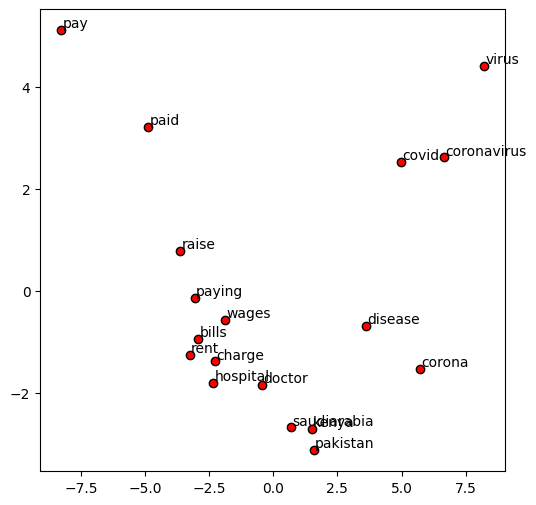

In [48]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

def display_pca_scatterplot(model, words=None, sample=0):
    if words is None:
        if sample > 0:
            words = np.random.choice(list(model.wv.index_to_key), sample)
        else:
            words = model.wv.index_to_key
        
    word_vectors = np.array([model.wv[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

display_pca_scatterplot(w2v, ['coronavirus', 'covid', 'virus', 'corona', 'disease', 'saudiarabia', 'doctor', 'hospital', 'pakistan', 'kenya',
                              'pay', 'paying', 'paid', 'wages', 'raise', 'bills', 'rent', 'charge'])


## Why is Word2Vec revolutionary?

Word2Vec's powerful embeddings offer an advancement over earlier word vectorization methods like Latent Semantic Analysis (LSA), Singular Value Decomposition (SVD), and Global Vectors for Word Representation (GloVe), which existed before its introduction in 2013. Here's why:

- Word2Vec generates numerical vectors in a high-dimensional space while maintaining both semantic and syntactic relationships between words.
- It outperforms its predecessors by simplifying the representation of relationships into fixed-sized vectors, reducing dimensionality, and making mathematical analysis more straightforward.
- This technique is versatile, applicable to both textual and non-textual data, allowing for comparisons and similarity identification across a wide range of fields, from products and chemicals to genes and business concepts.

Word2Vec also supports training contextualized models using open-source code, optimized for speed and efficiency with specific datasets. For example, you can train a model on finance data if your target area is finance.

## What are the limitations of Word2Vec?

- **Has difficulty handling unknown words**

One major limitation of Word2Vec is its inability to manage unknown or out-of-vocabulary words. If the model has not seen a word before, it cannot generate a proper vector, defaulting to a random one, which is suboptimal. This issue is especially pronounced in noisy data environments like Twitter, where certain words are used infrequently across a large dataset.

- **Doesn’t have shared representations at sub-word levels**

Additionally, Word2Vec does not utilize shared representations at the sub-word level, treating each word as a standalone vector. This poses challenges for morphologically rich and polysynthetic languages like German, Turkish, and Arabic, where many words share similar morphological structures.

- **Difficult to scale to new languages**

Scaling Word2Vec to new languages requires creating new embedding matrices. However, without the ability to share parameters, the model cannot be easily adapted for cross-lingual applications.

## What are the applications of W2V?

Word2Vec models are extensively utilized across various natural language processing applications. There are some of the most popular use cases.

### Search Engines

Word2Vec enhances the accuracy of search results. When a user poses a question, the search engine converts it into a vector representation. This vector is then compared to the representations of documents or web pages to find the most relevant matches. The algorithm also allows search engines to grasp the context of a query. For instance, if a user searches for “apple,” Word2Vec can determine whether they are interested in the fruit or the technology company based on the surrounding context.

### Automated Translation

Word2Vec is employed in automated translation systems, using graphical representations of word meanings across different languages. Well-known applications include Google Translate and Translate.com.

### Customer Review Analysis

Businesses can utilize Word2Vec to analyze thousands of customer reviews and extract valuable insights. By creating vector representations of words tailored to specific survey datasets, organizations can capture the intricate relationships between reviewed responses and their contexts. This data can be leveraged by machine learning algorithms for further analysis, enabling the identification of common themes and sentiments, which can inform strategies to address customer concerns.

### Recommendation Systems

Word2Vec is not limited to textual data; it can also be applied to any sequential data, such as user click sessions, search histories, and purchase records. This data can be harnessed to build effective recommender systems that enhance online business profitability by improving click-through rates and conversions. By generating fixed-sized vector representations for various items, such as places or products, the model captures human-like relationships and similarities between them. For example, by analyzing vector similarity scores among products, recommendations can be made for accessories or additional equipment, such as suggesting complementary sports gear to athletes purchasing a barbell. Airbnb, for instance, has successfully trained Word2Vec models on user click and conversion data to generate business value.

## References

1. [Alammar, Jay, The Illustrated Word2vec](https://jalammar.github.io/illustrated-word2vec/)
2. [Logunova, Inna, Bolgurtseva, Olga, (2023), Word2Vec: Why Do We Need Word Representations?](https://serokell.io/blog/word2vec)
3. [Suri, Manan, (2022), A Dummy’s Guide to Word2Vec](https://medium.com/@manansuri/a-dummys-guide-to-word2vec-456444f3c673)
4. [Sumedhkadam, (2024), Word Embedding using Word2Vec](https://www.geeksforgeeks.org/python-word-embedding-using-word2vec/)

